## Unsupervised learning

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

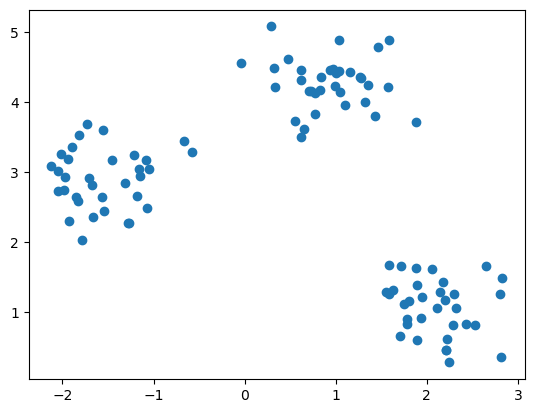

In [5]:
# Generate data
X,y = make_blobs(n_samples = 100, centers = 3 , cluster_std = 0.4, random_state = 0)
plt.scatter(X[:,0],X[:,1])

## (1) K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-30.870531280140675

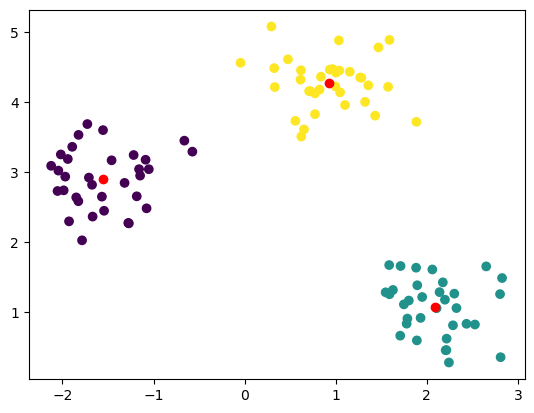

In [9]:
model = KMeans(n_clusters = 3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0],X[:,1], c =model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

## Elbow method

In [10]:
inertia = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(n_clusters = k).fit(X)
    inertia.append(model.inertia_)

C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Cout du modele (Inertia)')

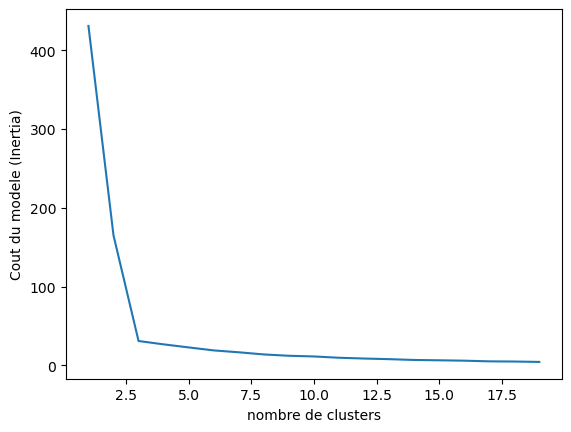

In [11]:
plt.plot(k_range , inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## (2) IsolationForest : AnomalyDetection 

In [14]:
X,y = make_blobs(n_samples = 50, centers = 1, cluster_std = 0.1 , random_state = 0)
X[-1,:] = np.array([2.25 , 5])

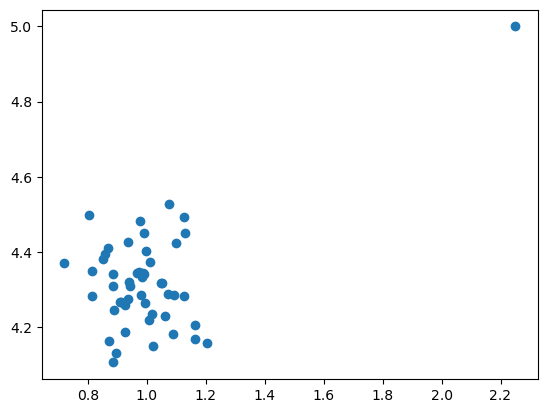

In [15]:
plt.scatter(X[:,0], X[:,1])

In [16]:
from sklearn.ensemble import IsolationForest

In [18]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

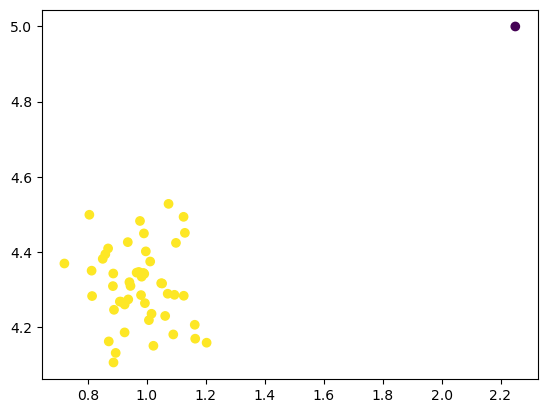

In [19]:
plt.scatter(X[:,0], X[:,1], c = model.predict(X))

## Apply Digits

In [20]:
from sklearn.datasets import load_digits

In [23]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


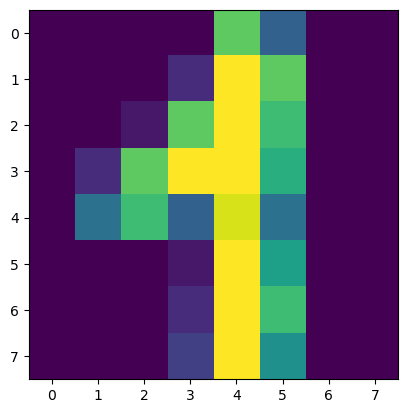

In [24]:
plt.imshow(images[42])

In [25]:
model = IsolationForest(random_state = 0, contamination = 0.02)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [26]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
outliers = model.predict(X) == -1

In [28]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

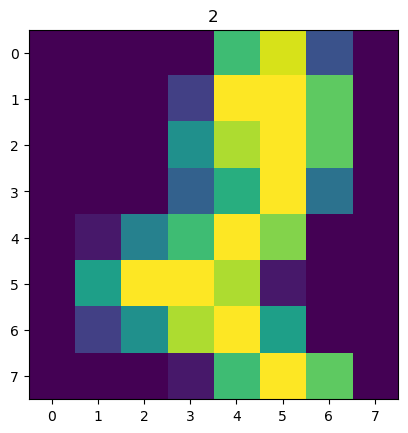

In [31]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

## (3) PCA 

In [32]:
from sklearn.decomposition import PCA

In [33]:
X.shape

(1797, 64)

In [36]:
model = PCA(n_components = 2)
X_reduce = model.fit_transform(X)

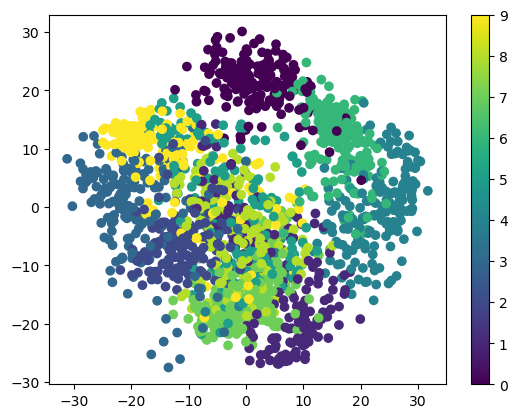

In [38]:
plt.scatter(X_reduce[:,0], X_reduce[:,1], c = y)
plt.colorbar()

In [39]:
model.components_.shape

(2, 64)

In [46]:
np.cumsum(model.components_)

array([-1.77484909e-19, -1.73094651e-02, -2.40738300e-01, ...,
        3.75356542e+00,  3.75356542e+00,  3.75356542e+00])

In [44]:
model = PCA(n_components = 64)
X_reduce = model.fit_transform(X)

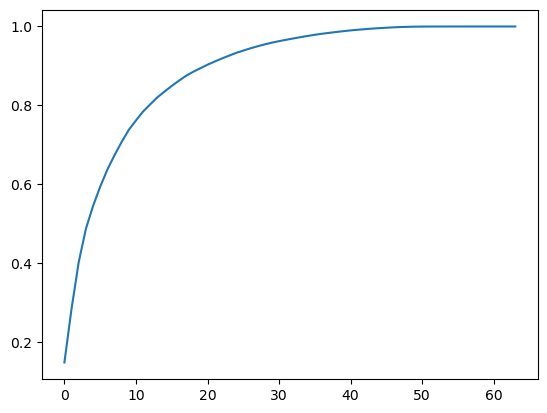

In [48]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [52]:
np.argmax(np.cumsum(model.explained_variance_ratio_)> 0.99)

40

In [53]:
model = PCA(n_components = 40)
X_reduce = model.fit_transform(X)

In [54]:
X_recovered = model.inverse_transform(X_reduce)

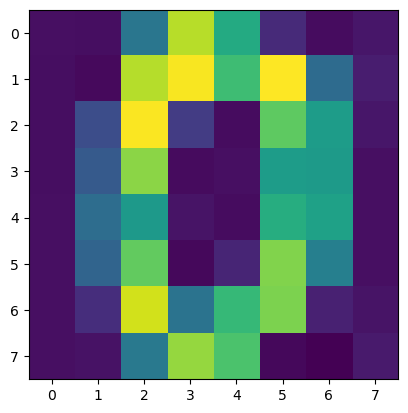

In [55]:
plt.imshow(X_recovered[0].reshape((8,8)))

In [56]:
model = PCA(n_components = 0.95)
X_reduce = model.fit_transform(X)

In [57]:
X_recovered = model.inverse_transform(X_reduce)

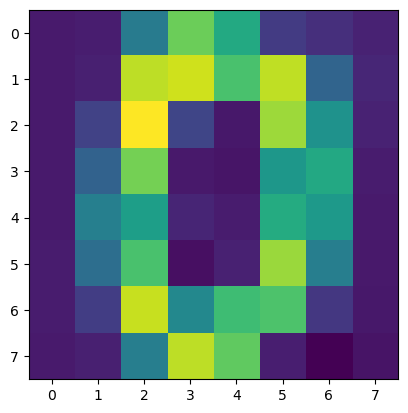

In [58]:
plt.imshow(X_recovered[0].reshape((8,8)))

In [59]:
model.n_components_

29